In [5]:
import os

# 設定資料集根目錄
dataset_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_classification'  # 修改成你自己的資料夾路徑

# 取得分類資料夾列表
categories = ['CTEM', 'HR-TEM', 'STEM', 'SEM', 'None', 'Diffraction']

# 統計每個資料夾的圖片數量
for category in categories:
    folder_path = os.path.join(dataset_root, category)
    if os.path.exists(folder_path):
        file_count = len([
            f for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        print(f'{category:12s}: {file_count} images')
    else:
        print(f'{category:12s}: 資料夾不存在')


CTEM        : 1869 images
HR-TEM      : 2496 images
STEM        : 2208 images
SEM         : 2198 images
None        : 1643 images
Diffraction : 1608 images


In [4]:
import os
from PIL import Image
from torchvision import transforms
import random

# 需要增強的類別
augment_categories = ['HR-TEM', 'STEM', 'Diffraction']
dataset_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_classification'

# 每張圖額外產生幾張增強圖
augment_count = 3

# 定義增強方法（可依需求調整）
augmentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.8, 1.0)),  # 可以換成 Resize
])

for category in augment_categories:
    folder_path = os.path.join(dataset_root, category)
    images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for image_name in images:
        image_path = os.path.join(folder_path, image_name)
        try:
            image = Image.open(image_path).convert('RGB')
        except Exception as e:
            print(f"無法讀取 {image_name}: {e}")
            continue

        for i in range(augment_count):
            aug_img = augmentation(image)
            new_name = f"{os.path.splitext(image_name)[0]}_aug{i}.jpg"
            new_path = os.path.join(folder_path, new_name)
            aug_img.save(new_path)

        print(f"✅ 已增強: {image_name} -> {augment_count} 張")


✅ 已增強: PDF10003_Image1_2.png -> 3 張
✅ 已增強: PDF10003_Image1_4.png -> 3 張
✅ 已增強: PDF10004_Image1_2.png -> 3 張
✅ 已增強: PDF10005_Image1_4.png -> 3 張
✅ 已增強: PDF10005_Image1_9.png -> 3 張
✅ 已增強: PDF10006_Image2_1.png -> 3 張
✅ 已增強: PDF10006_Image2_2.png -> 3 張
✅ 已增強: PDF10006_Image3_1.png -> 3 張
✅ 已增強: PDF10006_Image4_3.png -> 3 張
✅ 已增強: PDF10006_Image4_5.png -> 3 張
✅ 已增強: PDF10009_Image1_6.png -> 3 張
✅ 已增強: PDF10012_Image3_2.png -> 3 張
✅ 已增強: PDF10015_Image2_2.png -> 3 張
✅ 已增強: PDF10015_Image2_4.png -> 3 張
✅ 已增強: PDF10075_Image1_1.png -> 3 張
✅ 已增強: PDF10077_Image1_10.png -> 3 張
✅ 已增強: PDF1007_Image2_2.png -> 3 張
✅ 已增強: PDF10082_Image1_1.png -> 3 張
✅ 已增強: PDF10013_Image1_1.png -> 3 張
✅ 已增強: PDF1048_Image1_1.png -> 3 張
✅ 已增強: PDF1048_Image1_2.png -> 3 張
✅ 已增強: PDF10007_Image1_1.png -> 3 張
✅ 已增強: PDF10017_Image1_1.png -> 3 張
✅ 已增強: PDF10043_Image1_2.png -> 3 張
✅ 已增強: PDF10087_Image1_1.png -> 3 張
✅ 已增強: PDF10088_Image2_3.png -> 3 張
✅ 已增強: PDF10090_Image2_1.png -> 3 張
✅ 已增強: PDF10090_Image2_3.png -

In [6]:
import os
import shutil
import random

# 原始資料集路徑（六類放一起）
src_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_classification'

# 新的資料夾結構
dst_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_split'
splits = ['train', 'val', 'test']
split_ratio = {'train': 0.7, 'val': 0.15, 'test': 0.15}

categories = ['CTEM', 'HR-TEM', 'STEM', 'SEM', 'None', 'Diffraction']

# 建立資料夾結構
for split in splits:
    for category in categories:
        os.makedirs(os.path.join(dst_root, split, category), exist_ok=True)

# 分割資料
for category in categories:
    src_folder = os.path.join(src_root, category)
    images = [f for f in os.listdir(src_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    random.shuffle(images)

    train_end = int(len(images) * split_ratio['train'])
    val_end = train_end + int(len(images) * split_ratio['val'])

    for i, img in enumerate(images):
        if i < train_end:
            split = 'train'
        elif i < val_end:
            split = 'val'
        else:
            split = 'test'

        src_path = os.path.join(src_folder, img)
        dst_path = os.path.join(dst_root, split, category, img)
        shutil.copy2(src_path, dst_path)

    print(f"{category:12s}: train={train_end}, val={val_end-train_end}, test={len(images)-val_end}")


CTEM        : train=1308, val=280, test=281
HR-TEM      : train=1747, val=374, test=375
STEM        : train=1545, val=331, test=332
SEM         : train=1538, val=329, test=331
None        : train=1150, val=246, test=247
Diffraction : train=1125, val=241, test=242


In [9]:
import os
import shutil

# 原始六類分類資料夾
src_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_split'
# 新的二分類資料夾
dst_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_binary'

# 三個分割區
splits = ['train', 'val', 'test']
none_label = 'None'
all_categories = ['CTEM', 'HR-TEM', 'STEM', 'SEM', 'Diffraction', 'None']

# 建立目標資料夾結構
for split in splits:
    for label in ['None', 'NotNone']:
        os.makedirs(os.path.join(dst_root, split, label), exist_ok=True)

# 開始分類搬移資料
for split in splits:
    for category in all_categories:
        src_folder = os.path.join(src_root, split, category)
        if not os.path.exists(src_folder):
            continue

        # 決定這個分類屬於 None or NotNone
        target_label = 'None' if category == none_label else 'NotNone'
        dst_folder = os.path.join(dst_root, split, target_label)

        for fname in os.listdir(src_folder):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                src_path = os.path.join(src_folder, fname)
                dst_path = os.path.join(dst_folder, f"{category}_{fname}")
                shutil.copy2(src_path, dst_path)

        print(f"[{split}] {category} -> {target_label}, 完成搬移")

print("✅ 二分類資料集產生完成！")

[train] CTEM -> NotNone, 完成搬移
[train] HR-TEM -> NotNone, 完成搬移
[train] STEM -> NotNone, 完成搬移
[train] SEM -> NotNone, 完成搬移
[train] Diffraction -> NotNone, 完成搬移
[train] None -> None, 完成搬移
[val] CTEM -> NotNone, 完成搬移
[val] HR-TEM -> NotNone, 完成搬移
[val] STEM -> NotNone, 完成搬移
[val] SEM -> NotNone, 完成搬移
[val] Diffraction -> NotNone, 完成搬移
[val] None -> None, 完成搬移
[test] CTEM -> NotNone, 完成搬移
[test] HR-TEM -> NotNone, 完成搬移
[test] STEM -> NotNone, 完成搬移
[test] SEM -> NotNone, 完成搬移
[test] Diffraction -> NotNone, 完成搬移
[test] None -> None, 完成搬移
✅ 二分類資料集產生完成！


類別標籤對應： ['None', 'NotNone']

Epoch 1/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.11it/s]


✅ 儲存最佳模型 (Val Acc: 95.11%)
Train Loss: 0.2177 | Train Acc: 91.11% | Val Acc: 95.11% | LR: 0.000100

Epoch 2/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.59it/s]


✅ 儲存最佳模型 (Val Acc: 95.72%)
Train Loss: 0.0897 | Train Acc: 96.70% | Val Acc: 95.72% | LR: 0.000100

Epoch 3/50


Training: 100%|███████████████████████████████| 263/263 [00:15<00:00, 16.54it/s]


✅ 儲存最佳模型 (Val Acc: 97.00%)
Train Loss: 0.0606 | Train Acc: 97.73% | Val Acc: 97.00% | LR: 0.000100

Epoch 4/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.86it/s]


Train Loss: 0.0368 | Train Acc: 98.63% | Val Acc: 96.78% | LR: 0.000100

Epoch 5/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.90it/s]


Train Loss: 0.0315 | Train Acc: 98.93% | Val Acc: 96.72% | LR: 0.000100

Epoch 6/50


Training: 100%|███████████████████████████████| 263/263 [00:15<00:00, 16.85it/s]


✅ 儲存最佳模型 (Val Acc: 97.56%)
Train Loss: 0.0159 | Train Acc: 99.55% | Val Acc: 97.56% | LR: 0.000010

Epoch 7/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.72it/s]


✅ 儲存最佳模型 (Val Acc: 97.67%)
Train Loss: 0.0106 | Train Acc: 99.79% | Val Acc: 97.67% | LR: 0.000010

Epoch 8/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.09it/s]


✅ 儲存最佳模型 (Val Acc: 97.72%)
Train Loss: 0.0065 | Train Acc: 99.90% | Val Acc: 97.72% | LR: 0.000010

Epoch 9/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.65it/s]


Train Loss: 0.0074 | Train Acc: 99.83% | Val Acc: 97.67% | LR: 0.000010

Epoch 10/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.09it/s]


✅ 儲存最佳模型 (Val Acc: 97.95%)
Train Loss: 0.0050 | Train Acc: 99.90% | Val Acc: 97.95% | LR: 0.000010

Epoch 11/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.43it/s]


Train Loss: 0.0043 | Train Acc: 99.96% | Val Acc: 97.78% | LR: 0.000001

Epoch 12/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.68it/s]


Train Loss: 0.0048 | Train Acc: 99.94% | Val Acc: 97.89% | LR: 0.000001

Epoch 13/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.85it/s]


Train Loss: 0.0046 | Train Acc: 99.94% | Val Acc: 97.83% | LR: 0.000001

Epoch 14/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.04it/s]


✅ 儲存最佳模型 (Val Acc: 98.00%)
Train Loss: 0.0051 | Train Acc: 99.92% | Val Acc: 98.00% | LR: 0.000001

Epoch 15/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.20it/s]


Train Loss: 0.0043 | Train Acc: 99.93% | Val Acc: 98.00% | LR: 0.000001

Epoch 16/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.07it/s]


Train Loss: 0.0042 | Train Acc: 99.90% | Val Acc: 97.95% | LR: 0.000000

Epoch 17/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.28it/s]


Train Loss: 0.0043 | Train Acc: 99.93% | Val Acc: 97.83% | LR: 0.000000

Epoch 18/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.53it/s]


Train Loss: 0.0046 | Train Acc: 99.93% | Val Acc: 97.95% | LR: 0.000000

Epoch 19/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.78it/s]


Train Loss: 0.0042 | Train Acc: 99.96% | Val Acc: 97.95% | LR: 0.000000

Epoch 20/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.34it/s]


Train Loss: 0.0044 | Train Acc: 99.90% | Val Acc: 97.72% | LR: 0.000000

Epoch 21/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.06it/s]


Train Loss: 0.0039 | Train Acc: 99.95% | Val Acc: 98.00% | LR: 0.000000

Epoch 22/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.34it/s]


Train Loss: 0.0044 | Train Acc: 99.93% | Val Acc: 98.00% | LR: 0.000000

Epoch 23/50


Training: 100%|███████████████████████████████| 263/263 [00:15<00:00, 16.72it/s]


Train Loss: 0.0043 | Train Acc: 99.95% | Val Acc: 97.89% | LR: 0.000000

Epoch 24/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.62it/s]


Train Loss: 0.0042 | Train Acc: 99.94% | Val Acc: 97.67% | LR: 0.000000

Epoch 25/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.42it/s]


Train Loss: 0.0041 | Train Acc: 99.96% | Val Acc: 97.89% | LR: 0.000000

Epoch 26/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.26it/s]


Train Loss: 0.0046 | Train Acc: 99.89% | Val Acc: 97.72% | LR: 0.000000

Epoch 27/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.44it/s]


Train Loss: 0.0045 | Train Acc: 99.93% | Val Acc: 97.89% | LR: 0.000000

Epoch 28/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.47it/s]


Train Loss: 0.0050 | Train Acc: 99.94% | Val Acc: 97.83% | LR: 0.000000

Epoch 29/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.78it/s]


Train Loss: 0.0038 | Train Acc: 99.94% | Val Acc: 97.78% | LR: 0.000000

Epoch 30/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.36it/s]


✅ 儲存最佳模型 (Val Acc: 98.11%)
Train Loss: 0.0054 | Train Acc: 99.89% | Val Acc: 98.11% | LR: 0.000000

Epoch 31/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.38it/s]


Train Loss: 0.0040 | Train Acc: 99.93% | Val Acc: 97.78% | LR: 0.000000

Epoch 32/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.61it/s]


Train Loss: 0.0038 | Train Acc: 99.96% | Val Acc: 97.78% | LR: 0.000000

Epoch 33/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.94it/s]


Train Loss: 0.0044 | Train Acc: 99.94% | Val Acc: 97.89% | LR: 0.000000

Epoch 34/50


Training: 100%|███████████████████████████████| 263/263 [00:15<00:00, 16.51it/s]


Train Loss: 0.0041 | Train Acc: 99.94% | Val Acc: 97.95% | LR: 0.000000

Epoch 35/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.67it/s]


Train Loss: 0.0044 | Train Acc: 99.94% | Val Acc: 98.00% | LR: 0.000000

Epoch 36/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.36it/s]


Train Loss: 0.0051 | Train Acc: 99.86% | Val Acc: 97.89% | LR: 0.000000

Epoch 37/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.77it/s]


Train Loss: 0.0040 | Train Acc: 99.95% | Val Acc: 97.95% | LR: 0.000000

Epoch 38/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.13it/s]


Train Loss: 0.0043 | Train Acc: 99.95% | Val Acc: 97.89% | LR: 0.000000

Epoch 39/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.35it/s]


Train Loss: 0.0037 | Train Acc: 99.96% | Val Acc: 97.78% | LR: 0.000000

Epoch 40/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.35it/s]


Train Loss: 0.0040 | Train Acc: 99.93% | Val Acc: 97.83% | LR: 0.000000

Epoch 41/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.48it/s]


Train Loss: 0.0036 | Train Acc: 99.94% | Val Acc: 97.78% | LR: 0.000000

Epoch 42/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.62it/s]


Train Loss: 0.0039 | Train Acc: 99.95% | Val Acc: 97.83% | LR: 0.000000

Epoch 43/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.95it/s]


Train Loss: 0.0041 | Train Acc: 99.95% | Val Acc: 97.95% | LR: 0.000000

Epoch 44/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.56it/s]


Train Loss: 0.0045 | Train Acc: 99.90% | Val Acc: 97.72% | LR: 0.000000

Epoch 45/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.25it/s]


Train Loss: 0.0044 | Train Acc: 99.95% | Val Acc: 97.83% | LR: 0.000000

Epoch 46/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.62it/s]


Train Loss: 0.0035 | Train Acc: 99.98% | Val Acc: 97.95% | LR: 0.000000

Epoch 47/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 16.04it/s]


Train Loss: 0.0041 | Train Acc: 99.95% | Val Acc: 98.06% | LR: 0.000000

Epoch 48/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.48it/s]


Train Loss: 0.0049 | Train Acc: 99.90% | Val Acc: 97.83% | LR: 0.000000

Epoch 49/50


Training: 100%|███████████████████████████████| 263/263 [00:17<00:00, 15.30it/s]


Train Loss: 0.0042 | Train Acc: 99.94% | Val Acc: 97.89% | LR: 0.000000

Epoch 50/50


Training: 100%|███████████████████████████████| 263/263 [00:16<00:00, 15.66it/s]


Train Loss: 0.0040 | Train Acc: 99.95% | Val Acc: 97.83% | LR: 0.000000
📊 已儲存訓練過程圖：training_metrics_summary.png


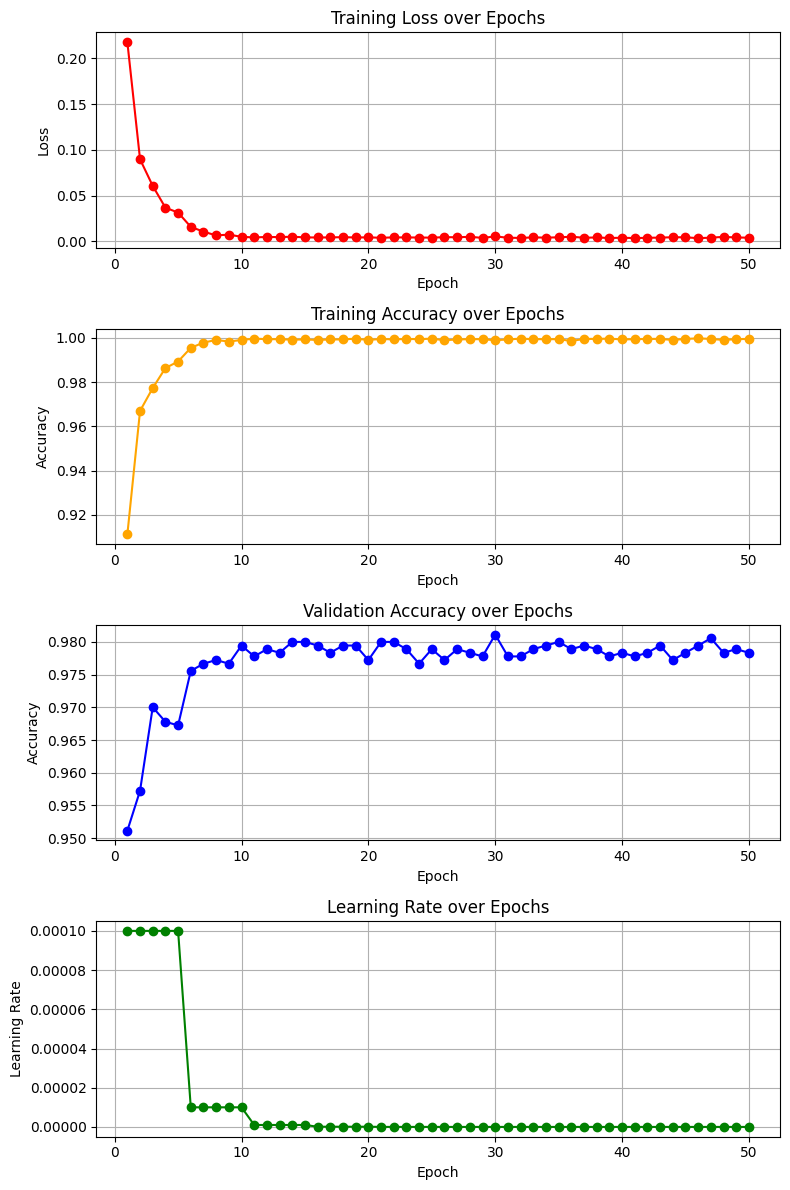

In [16]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import matplotlib.pyplot as plt

# ====== 設定參數 ======
data_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_binary'
batch_size = 32
num_epochs = 50
initial_lr = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== 圖像轉換 ======
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
}

# ====== 載入資料集 ======
datasets_binary = {
    x: datasets.ImageFolder(os.path.join(data_root, x), transform=transform[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: DataLoader(datasets_binary[x], batch_size=batch_size, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}
class_names = datasets_binary['train'].classes
print("類別標籤對應：", class_names)

# ====== 建立模型 ======
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# ====== Optimizer & Scheduler ======
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# ====== 記錄訓練資料 ======
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []
best_val_acc = 0.0
best_model_path = "best_binary_classifier.pth"

# ====== 訓練主迴圈 ======
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    model.train()
    running_loss, running_corrects, total = 0.0, 0, 0

    for inputs, labels in tqdm(dataloaders['train'], desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_corrects.double() / total

    # 驗證階段
    model.eval()
    val_corrects, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_acc = val_corrects.double() / val_total
    current_lr = optimizer.param_groups[0]['lr']

    # 更新最佳模型
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ 儲存最佳模型 (Val Acc: {val_acc:.2%})")

    # 紀錄數據
    loss_history.append(train_loss)
    train_acc_history.append(train_acc.item())
    val_acc_history.append(val_acc.item())
    lr_history.append(current_lr)

    scheduler.step()
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} | Val Acc: {val_acc:.2%} | LR: {current_lr:.6f}")

# ====== 繪製圖形並儲存 ======
epochs = list(range(1, num_epochs + 1))
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

axs[0].plot(epochs, loss_history, color='red', marker='o')
axs[0].set_title("Training Loss over Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].grid(True)

axs[1].plot(epochs, train_acc_history, color='orange', marker='o')
axs[1].set_title("Training Accuracy over Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].grid(True)

axs[2].plot(epochs, val_acc_history, color='blue', marker='o')
axs[2].set_title("Validation Accuracy over Epochs")
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Accuracy")
axs[2].grid(True)

axs[3].plot(epochs, lr_history, color='green', marker='o')
axs[3].set_title("Learning Rate over Epochs")
axs[3].set_xlabel("Epoch")
axs[3].set_ylabel("Learning Rate")
axs[3].grid(True)

plt.tight_layout()
plt.savefig("training_metrics_summary.png")
print("📊 已儲存訓練過程圖：training_metrics_summary.png")
plt.show()


分類標籤： ['None', 'NotNone']


/home/ne6131039/anaconda3/envs/TEM_project/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ne6131039/anaconda3/envs/TEM_project/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_29711/3348162156.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `

✅ 測試準確率：97.68%


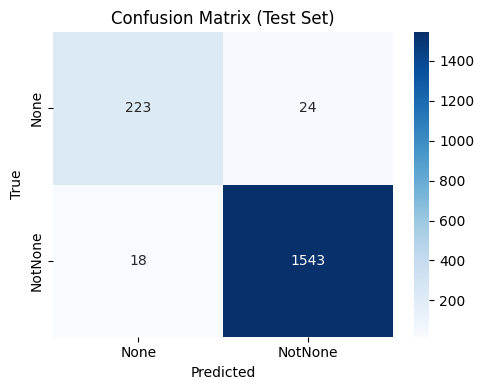


📋 詳細分類報告:
              precision    recall  f1-score   support

        None       0.93      0.90      0.91       247
     NotNone       0.98      0.99      0.99      1561

    accuracy                           0.98      1808
   macro avg       0.95      0.95      0.95      1808
weighted avg       0.98      0.98      0.98      1808



In [18]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====== 參數設定 ======
test_dir = '/home/ne6131039/Desktop/TEM_DATAS/TEM_binary/test'
model_path = 'best_binary_classifier.pth'
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ====== 圖像預處理 ======
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ====== 載入測試資料集 ======
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
class_names = test_dataset.classes
print("分類標籤：", class_names)

# ====== 載入模型並轉移至 GPU ======
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load(model_path))
model.to(device)
model.eval()

# ====== 推論並紀錄結果 ======
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# ====== 整體準確率 ======
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
acc = (all_preds == all_labels).sum() / len(all_labels)
print(f"✅ 測試準確率：{acc:.2%}")

# ====== 混淆矩陣與報告 ======
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.tight_layout()
plt.savefig("test_confusion_matrix.png")
plt.show()

print("\n📋 詳細分類報告:")
print(classification_report(all_labels, all_preds, target_names=class_names))


五類標籤： ['CTEM', 'Diffraction', 'HR-TEM', 'SEM', 'STEM']

Epoch 1/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.03it/s]


✅ 儲存最佳模型 (Val Acc: 92.28%)
Train Loss: 0.4070 | Train Acc: 85.49% | Val Acc: 92.28% | LR: 0.000100

Epoch 2/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.27it/s]


✅ 儲存最佳模型 (Val Acc: 92.73%)
Train Loss: 0.1693 | Train Acc: 94.19% | Val Acc: 92.73% | LR: 0.000100

Epoch 3/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.13it/s]


✅ 儲存最佳模型 (Val Acc: 94.15%)
Train Loss: 0.0928 | Train Acc: 96.93% | Val Acc: 94.15% | LR: 0.000100

Epoch 4/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.54it/s]


Train Loss: 0.0720 | Train Acc: 97.70% | Val Acc: 93.89% | LR: 0.000100

Epoch 5/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.10it/s]


✅ 儲存最佳模型 (Val Acc: 94.41%)
Train Loss: 0.0595 | Train Acc: 98.02% | Val Acc: 94.41% | LR: 0.000100

Epoch 6/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.52it/s]


✅ 儲存最佳模型 (Val Acc: 95.95%)
Train Loss: 0.0281 | Train Acc: 99.09% | Val Acc: 95.95% | LR: 0.000010

Epoch 7/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.22it/s]


✅ 儲存最佳模型 (Val Acc: 96.27%)
Train Loss: 0.0200 | Train Acc: 99.53% | Val Acc: 96.27% | LR: 0.000010

Epoch 8/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.99it/s]


Train Loss: 0.0151 | Train Acc: 99.71% | Val Acc: 96.27% | LR: 0.000010

Epoch 9/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.97it/s]


✅ 儲存最佳模型 (Val Acc: 96.40%)
Train Loss: 0.0112 | Train Acc: 99.85% | Val Acc: 96.40% | LR: 0.000010

Epoch 10/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.59it/s]


Train Loss: 0.0105 | Train Acc: 99.86% | Val Acc: 96.14% | LR: 0.000010

Epoch 11/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.10it/s]


Train Loss: 0.0090 | Train Acc: 99.86% | Val Acc: 96.27% | LR: 0.000001

Epoch 12/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.29it/s]


Train Loss: 0.0089 | Train Acc: 99.86% | Val Acc: 96.21% | LR: 0.000001

Epoch 13/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.57it/s]


✅ 儲存最佳模型 (Val Acc: 96.46%)
Train Loss: 0.0089 | Train Acc: 99.86% | Val Acc: 96.46% | LR: 0.000001

Epoch 14/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.96it/s]


Train Loss: 0.0085 | Train Acc: 99.86% | Val Acc: 96.40% | LR: 0.000001

Epoch 15/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.36it/s]


Train Loss: 0.0094 | Train Acc: 99.85% | Val Acc: 96.46% | LR: 0.000001

Epoch 16/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.59it/s]


Train Loss: 0.0092 | Train Acc: 99.86% | Val Acc: 96.21% | LR: 0.000000

Epoch 17/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.54it/s]


✅ 儲存最佳模型 (Val Acc: 96.53%)
Train Loss: 0.0072 | Train Acc: 99.94% | Val Acc: 96.53% | LR: 0.000000

Epoch 18/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.63it/s]


Train Loss: 0.0086 | Train Acc: 99.89% | Val Acc: 96.27% | LR: 0.000000

Epoch 19/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.91it/s]


Train Loss: 0.0074 | Train Acc: 99.96% | Val Acc: 96.21% | LR: 0.000000

Epoch 20/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.52it/s]


Train Loss: 0.0089 | Train Acc: 99.89% | Val Acc: 96.46% | LR: 0.000000

Epoch 21/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.44it/s]


Train Loss: 0.0077 | Train Acc: 99.89% | Val Acc: 96.40% | LR: 0.000000

Epoch 22/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.82it/s]


Train Loss: 0.0072 | Train Acc: 99.94% | Val Acc: 96.53% | LR: 0.000000

Epoch 23/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.66it/s]


Train Loss: 0.0090 | Train Acc: 99.79% | Val Acc: 96.40% | LR: 0.000000

Epoch 24/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.86it/s]


Train Loss: 0.0082 | Train Acc: 99.89% | Val Acc: 96.40% | LR: 0.000000

Epoch 25/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.10it/s]


Train Loss: 0.0076 | Train Acc: 99.90% | Val Acc: 96.53% | LR: 0.000000

Epoch 26/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.85it/s]


Train Loss: 0.0077 | Train Acc: 99.88% | Val Acc: 96.40% | LR: 0.000000

Epoch 27/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.51it/s]


Train Loss: 0.0078 | Train Acc: 99.86% | Val Acc: 96.14% | LR: 0.000000

Epoch 28/50


Training: 100%|███████████████████████████████| 227/227 [00:12<00:00, 17.59it/s]


Train Loss: 0.0075 | Train Acc: 99.94% | Val Acc: 96.14% | LR: 0.000000

Epoch 29/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.84it/s]


Train Loss: 0.0087 | Train Acc: 99.86% | Val Acc: 96.53% | LR: 0.000000

Epoch 30/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.76it/s]


Train Loss: 0.0092 | Train Acc: 99.85% | Val Acc: 96.40% | LR: 0.000000

Epoch 31/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.15it/s]


Train Loss: 0.0079 | Train Acc: 99.86% | Val Acc: 96.40% | LR: 0.000000

Epoch 32/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.81it/s]


✅ 儲存最佳模型 (Val Acc: 96.66%)
Train Loss: 0.0071 | Train Acc: 99.96% | Val Acc: 96.66% | LR: 0.000000

Epoch 33/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.29it/s]


Train Loss: 0.0090 | Train Acc: 99.86% | Val Acc: 96.53% | LR: 0.000000

Epoch 34/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.10it/s]


Train Loss: 0.0071 | Train Acc: 99.97% | Val Acc: 96.59% | LR: 0.000000

Epoch 35/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.99it/s]


Train Loss: 0.0084 | Train Acc: 99.89% | Val Acc: 96.53% | LR: 0.000000

Epoch 36/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.57it/s]


Train Loss: 0.0087 | Train Acc: 99.85% | Val Acc: 96.27% | LR: 0.000000

Epoch 37/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 15.99it/s]


Train Loss: 0.0085 | Train Acc: 99.82% | Val Acc: 96.53% | LR: 0.000000

Epoch 38/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.92it/s]


Train Loss: 0.0088 | Train Acc: 99.86% | Val Acc: 96.53% | LR: 0.000000

Epoch 39/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.60it/s]


Train Loss: 0.0074 | Train Acc: 99.92% | Val Acc: 96.27% | LR: 0.000000

Epoch 40/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.05it/s]


Train Loss: 0.0082 | Train Acc: 99.89% | Val Acc: 96.40% | LR: 0.000000

Epoch 41/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.67it/s]


Train Loss: 0.0088 | Train Acc: 99.86% | Val Acc: 96.33% | LR: 0.000000

Epoch 42/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.32it/s]


Train Loss: 0.0093 | Train Acc: 99.83% | Val Acc: 96.08% | LR: 0.000000

Epoch 43/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.15it/s]


Train Loss: 0.0080 | Train Acc: 99.86% | Val Acc: 96.40% | LR: 0.000000

Epoch 44/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.80it/s]


Train Loss: 0.0083 | Train Acc: 99.88% | Val Acc: 96.46% | LR: 0.000000

Epoch 45/50


Training: 100%|███████████████████████████████| 227/227 [00:14<00:00, 16.20it/s]


Train Loss: 0.0094 | Train Acc: 99.89% | Val Acc: 96.40% | LR: 0.000000

Epoch 46/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 16.27it/s]


Train Loss: 0.0084 | Train Acc: 99.88% | Val Acc: 96.14% | LR: 0.000000

Epoch 47/50


Training: 100%|███████████████████████████████| 227/227 [00:13<00:00, 17.20it/s]


Train Loss: 0.0102 | Train Acc: 99.78% | Val Acc: 96.40% | LR: 0.000000

Epoch 48/50


Training: 100%|███████████████████████████████| 227/227 [00:12<00:00, 18.83it/s]


Train Loss: 0.0079 | Train Acc: 99.89% | Val Acc: 96.33% | LR: 0.000000

Epoch 49/50


Training: 100%|███████████████████████████████| 227/227 [00:12<00:00, 18.57it/s]


Train Loss: 0.0090 | Train Acc: 99.85% | Val Acc: 96.27% | LR: 0.000000

Epoch 50/50


Training: 100%|███████████████████████████████| 227/227 [00:11<00:00, 19.18it/s]


Train Loss: 0.0081 | Train Acc: 99.90% | Val Acc: 96.53% | LR: 0.000000
📊 已儲存五類訓練圖：five_class_training_metrics.png


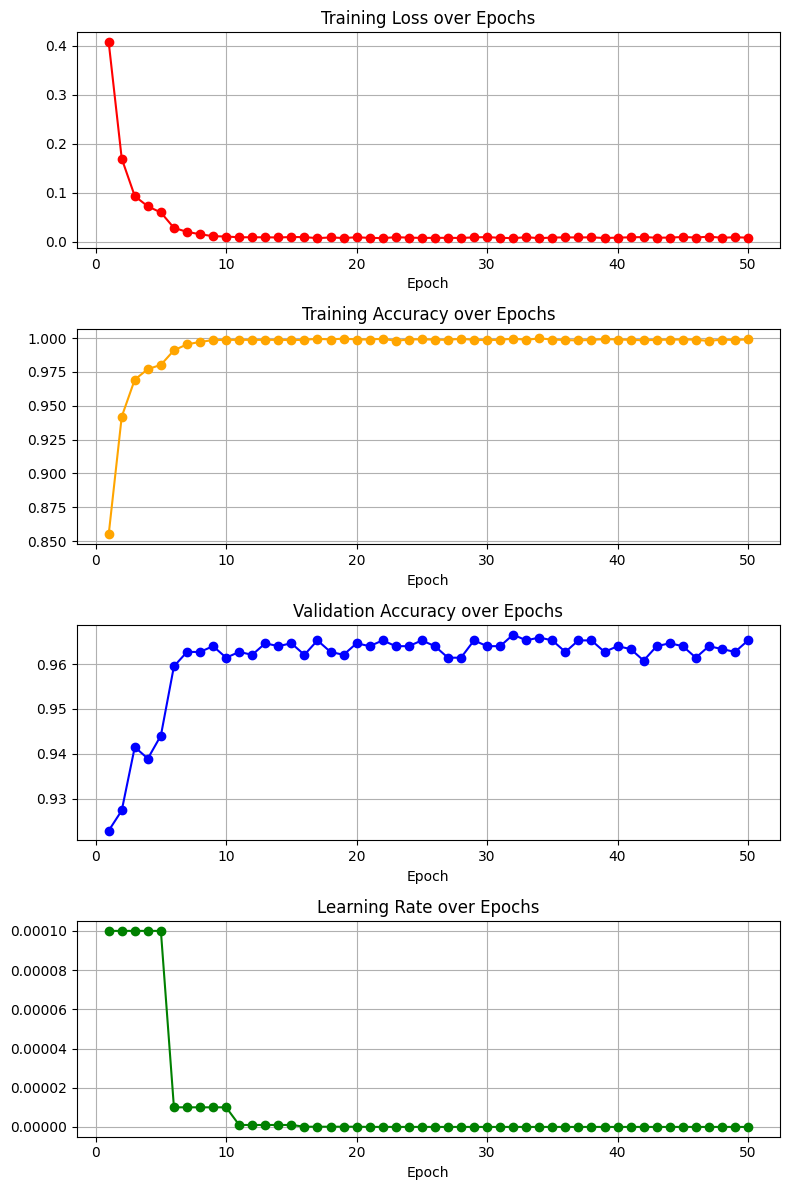

In [20]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import StepLR
from tqdm import tqdm
import matplotlib.pyplot as plt

# ====== 設定參數 ======
data_root = '/home/ne6131039/Desktop/TEM_DATAS/TEM_split'
batch_size = 32
num_epochs = 50
initial_lr = 0.0001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ====== 圖像轉換 ======
transform = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])
}

# ====== 載入資料集 ======
datasets_multi = {
    x: datasets.ImageFolder(os.path.join(data_root, x), transform=transform[x])
    for x in ['train', 'val']
}
dataloaders = {
    x: DataLoader(datasets_multi[x], batch_size=batch_size, shuffle=True, num_workers=4)
    for x in ['train', 'val']
}
class_names = datasets_multi['train'].classes
num_classes = len(class_names)
print("五類標籤：", class_names)

# ====== 建立模型 ======
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# ====== Loss、Optimizer、Scheduler ======
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=initial_lr)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# ====== 記錄訓練資料 ======
loss_history = []
train_acc_history = []
val_acc_history = []
lr_history = []
best_val_acc = 0.0
best_model_path = "best_five_class_classifier.pth"

# ====== 訓練主迴圈 ======
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    model.train()
    running_loss, running_corrects, total = 0.0, 0, 0

    for inputs, labels in tqdm(dataloaders['train'], desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    train_loss = running_loss / total
    train_acc = running_corrects.double() / total

    # 驗證階段
    model.eval()
    val_corrects, val_total = 0, 0
    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data)
            val_total += labels.size(0)

    val_acc = val_corrects.double() / val_total
    current_lr = optimizer.param_groups[0]['lr']

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), best_model_path)
        print(f"✅ 儲存最佳模型 (Val Acc: {val_acc:.2%})")

    loss_history.append(train_loss)
    train_acc_history.append(train_acc.item())
    val_acc_history.append(val_acc.item())
    lr_history.append(current_lr)

    scheduler.step()
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2%} | Val Acc: {val_acc:.2%} | LR: {current_lr:.6f}")

# ====== 繪圖並儲存 ======
epochs = list(range(1, num_epochs + 1))
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

axs[0].plot(epochs, loss_history, color='red', marker='o')
axs[0].set_title("Training Loss over Epochs")

axs[1].plot(epochs, train_acc_history, color='orange', marker='o')
axs[1].set_title("Training Accuracy over Epochs")

axs[2].plot(epochs, val_acc_history, color='blue', marker='o')
axs[2].set_title("Validation Accuracy over Epochs")

axs[3].plot(epochs, lr_history, color='green', marker='o')
axs[3].set_title("Learning Rate over Epochs")

for ax in axs:
    ax.set_xlabel("Epoch")
    ax.grid(True)

plt.tight_layout()
plt.savefig("five_class_training_metrics.png")
print("📊 已儲存五類訓練圖：five_class_training_metrics.png")
plt.show()


測試類別順序： ['CTEM', 'Diffraction', 'HR-TEM', 'SEM', 'STEM']


/home/ne6131039/anaconda3/envs/TEM_project/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/tmp/ipykernel_29711/1063041801.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializa


✅ 測試準確率：95.90%


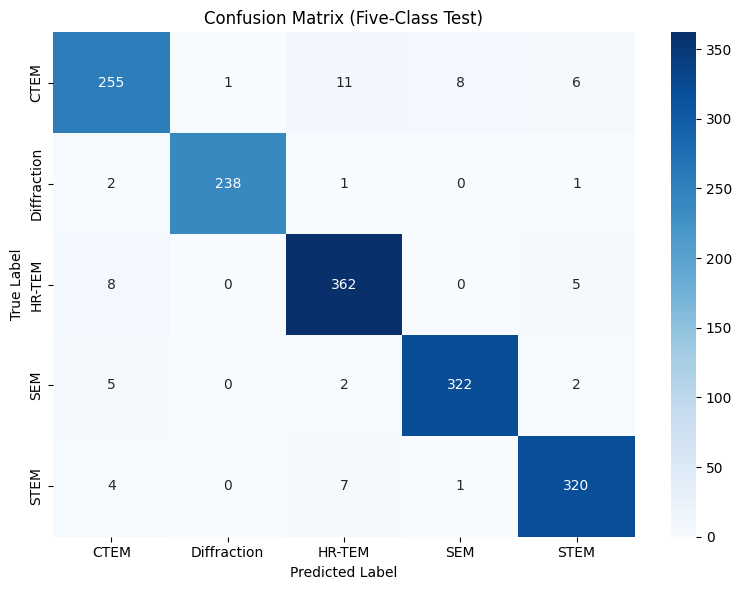


📋 詳細分類報告：
              precision    recall  f1-score   support

        CTEM       0.93      0.91      0.92       281
 Diffraction       1.00      0.98      0.99       242
      HR-TEM       0.95      0.97      0.96       375
         SEM       0.97      0.97      0.97       331
        STEM       0.96      0.96      0.96       332

    accuracy                           0.96      1561
   macro avg       0.96      0.96      0.96      1561
weighted avg       0.96      0.96      0.96      1561



In [22]:
import os
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ====== 路徑設定 ======
test_dir = '/home/ne6131039/Desktop/TEM_DATAS/TEM_split/test'
model_path = 'best_five_class_classifier.pth'
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ====== 圖像轉換 ======
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# ====== 載入測試集 ======
test_dataset = datasets.ImageFolder(test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
class_names = test_dataset.classes
num_classes = len(class_names)
print("測試類別順序：", class_names)

# ====== 建立模型 & 載入權重 ======
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(model_path))
model = model.to(device)
model.eval()

# ====== 推論所有測試資料 ======
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
acc = (all_preds == all_labels).sum() / len(all_labels)
print(f"\n✅ 測試準確率：{acc:.2%}")

# ====== 混淆矩陣 ======
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Five-Class Test)')
plt.tight_layout()
plt.savefig("five_class_test_confusion_matrix.png")
plt.show()

# ====== 詳細報告 ======
print("\n📋 詳細分類報告：")
print(classification_report(all_labels, all_preds, target_names=class_names))
